<a href="https://colab.research.google.com/github/hyrahmaaa/Submission-MLT-1/blob/main/Proyek_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Prediktif: [Prediksi Harga Saham Harian Menggunakan LSTM : PT Bank Rakyat Indonesia (Persero) Tbk (BBRI.JK)]
- **Nama:** Rahayu Nur Rahmawati
- **Email:** a229xbm406@devacademy.id
- **ID Dicoding:** A229XBM406


#Business Understanding

**PROBLEM STATEMENT**

Berdasarkan fluktuasi harga saham PT Bank Rakyat Indonesia (Persero) Tbk. (BBRI) yang dipengaruhi oleh berbagai faktor pasar, perusahaan ingin mengembangkan sebuah sistem prediksi harga saham untuk menjawab permasalahan berikut:

- Bagaimana tren pergerakan harga saham BBRI di masa depan?

- Berapa perkiraan harga saham BBRI pada periode waktu tertentu berdasarkan data historis?

**GOALS**

Untuk menjawab pertanyaan tersebut, proyek ini bertujuan untuk:

- Memahami pola dan tren pergerakan harga saham BBRI berdasarkan data historis.

- Membangun model machine learning (Long Short-Term Memory / LSTM) yang dapat memprediksi harga saham BBRI dengan tingkat akurasi yang memadai.

**METODOLOGI**

Prediksi harga saham adalah tujuan utama dalam proyek ini. Harga saham merupakan data deret waktu ( time series ) yang bersifat kontinu. Dalam predictive analytics, memprediksi nilai kontinu dalam konteks deret waktu memerlukan pendekatan khusus. Oleh karena itu, metodologi pada proyek ini adalah: membangun model recurrent neural network (RNN) dengan arsitektur Long Short-Term Memory (LSTM) untuk memprediksi harga saham BBRI sebagai target. LSTM dipilih karena kemampuannya dalam mempelajari ketergantungan jangka panjang dalam data sekuensial.

**METRIK**

Metrik digunakan untuk mengevaluasi seberapa baik model dalam memprediksi harga saham. Untuk kasus regresi pada deret waktu, beberapa metrik yang relevan digunakan, termasuk:

- Mean Absolute Error (MAE): Rata-rata nilai absolut dari selisih antara prediksi dan nilai aktual.

- Mean Squared Error (MSE): Rata-rata dari kuadrat selisih antara prediksi dan nilai aktual.

- Root Mean Squared Error (RMSE): Akar kuadrat dari MSE, memberikan ukuran kesalahan dalam unit yang sama dengan harga saham.

Tujuan dari pengembangan model ini adalah untuk meminimalkan nilai metrik-metrik kesalahan tersebut, sehingga menghasilkan prediksi harga saham yang seakurat mungkin.

**DATA**

Pengembangan model prediksi harga saham BBRI memerlukan data historis harga saham BBRI. Data ini biasanya mencakup informasi seperti tanggal, harga pembukaan, harga tertinggi, harga terendah, harga penutupan, dan volume perdagangan. Data ini dapat diperoleh dari berbagai sumber keuangan.

#Data Understanding

###Data Loading

Import Library yang digunakan

In [29]:
! pip install yfinance

In [54]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import joblib
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

Unggah Dataset

In [31]:
# Inisialisasi ticker untuk BBRI
ticker = yf.Ticker("BBRI.JK")

# Ambil data historis dari 1 Jan 2020 sampai hari ini
data = ticker.history(start="2015-01-01", end="2025-05-28")

# Simpan ke file CSV
data.to_csv("data_saham_BBRI.csv")

In [32]:
# Baca data dari file CSV
data = pd.read_csv("data_saham_BBRI.csv", index_col="Date", parse_dates=True)

# Tampilkan 5 baris pertama
print(data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2015-01-02 00:00:00+07:00  1334.106638  1357.258025  1334.106638  1348.576294   
2015-01-05 00:00:00+07:00  1342.787964  1354.363809  1339.894003  1342.787964   
2015-01-06 00:00:00+07:00  1337.000129  1345.682014  1331.212362  1334.106323   
2015-01-07 00:00:00+07:00  1342.787958  1363.045532  1339.893997  1363.045532   
2015-01-08 00:00:00+07:00  1365.939569  1386.197144  1365.939569  1386.197144   

                              Volume  Dividends  Stock Splits  
Date                                                           
2015-01-02 00:00:00+07:00   49671357        0.0           0.0  
2015-01-05 00:00:00+07:00   54526841        0.0           0.0  
2015-01-06 00:00:00+07:00   71601886        0.0           0.0  
2015-01-07 00:00:00+07:00  160783727        0.0           0.0  
2015-01-08 00:00:00+07:00  161332636        0.0 

In [33]:
data['Date'] = data.index

data.reset_index(drop=True, inplace=True)

print(data.head())
print(data.columns)

          Open         High          Low        Close     Volume  Dividends  \
0  1334.106638  1357.258025  1334.106638  1348.576294   49671357        0.0   
1  1342.787964  1354.363809  1339.894003  1342.787964   54526841        0.0   
2  1337.000129  1345.682014  1331.212362  1334.106323   71601886        0.0   
3  1342.787958  1363.045532  1339.893997  1363.045532  160783727        0.0   
4  1365.939569  1386.197144  1365.939569  1386.197144  161332636        0.0   

   Stock Splits                      Date  
0           0.0 2015-01-02 00:00:00+07:00  
1           0.0 2015-01-05 00:00:00+07:00  
2           0.0 2015-01-06 00:00:00+07:00  
3           0.0 2015-01-07 00:00:00+07:00  
4           0.0 2015-01-08 00:00:00+07:00  
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Date'],
      dtype='object')


In [35]:
# Pastikan kolom 'Date' bertipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# Ekstrak hanya bagian tanggalnya
data['Date_Only'] = data['Date'].dt.date

print(data[['Date', 'Date_Only']].head())

                       Date   Date_Only
0 2015-01-02 00:00:00+07:00  2015-01-02
1 2015-01-05 00:00:00+07:00  2015-01-05
2 2015-01-06 00:00:00+07:00  2015-01-06
3 2015-01-07 00:00:00+07:00  2015-01-07
4 2015-01-08 00:00:00+07:00  2015-01-08


In [7]:
# Menghapus kolom 'Date'
data.drop('Date', axis=1, inplace=True)

In [36]:
print(data.head())

          Open         High          Low        Close     Volume  Dividends  \
0  1334.106638  1357.258025  1334.106638  1348.576294   49671357        0.0   
1  1342.787964  1354.363809  1339.894003  1342.787964   54526841        0.0   
2  1337.000129  1345.682014  1331.212362  1334.106323   71601886        0.0   
3  1342.787958  1363.045532  1339.893997  1363.045532  160783727        0.0   
4  1365.939569  1386.197144  1365.939569  1386.197144  161332636        0.0   

   Stock Splits                      Date   Date_Only  
0           0.0 2015-01-02 00:00:00+07:00  2015-01-02  
1           0.0 2015-01-05 00:00:00+07:00  2015-01-05  
2           0.0 2015-01-06 00:00:00+07:00  2015-01-06  
3           0.0 2015-01-07 00:00:00+07:00  2015-01-07  
4           0.0 2015-01-08 00:00:00+07:00  2015-01-08  


In [37]:
data.shape

(2565, 9)

In [38]:
# Mendapatkan daftar nama kolom
labels = data.columns.tolist()
print(labels)

['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Date', 'Date_Only']


###Exploratory Data Analysis - Deskripsi Variabel

In [39]:
# Cek informasi umum termasuk jenis variabel dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   Open          2565 non-null   float64                  
 1   High          2565 non-null   float64                  
 2   Low           2565 non-null   float64                  
 3   Close         2565 non-null   float64                  
 4   Volume        2565 non-null   int64                    
 5   Dividends     2565 non-null   float64                  
 6   Stock Splits  2565 non-null   float64                  
 7   Date          2565 non-null   datetime64[ns, UTC+07:00]
 8   Date_Only     2565 non-null   object                   
dtypes: datetime64[ns, UTC+07:00](1), float64(6), int64(1), object(1)
memory usage: 180.5+ KB
None


In [40]:
# Statistik deskriptif
print(data.describe())

              Open         High          Low        Close        Volume  \
count  2565.000000  2565.000000  2565.000000  2565.000000  2.565000e+03   
mean   2776.211790  2806.336605  2744.910745  2774.470265  1.585218e+08   
std    1141.435772  1152.331830  1130.870208  1140.729193  1.057991e+08   
min     953.259796   991.745411   944.378507   982.864136  0.000000e+00   
25%    1862.191663  1883.476680  1840.172529  1855.900879  9.383294e+07   
50%    2725.855554  2752.711426  2692.285834  2727.552979  1.318476e+08   
75%    3676.563308  3717.414012  3638.539795  3669.974365  1.915672e+08   
max    5763.100219  5785.969664  5694.491883  5763.100098  1.000598e+09   

         Dividends  Stock Splits  
count  2565.000000   2565.000000  
mean      0.691260      0.001949  
std      10.398888      0.098725  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max     235.000000      5.000000  


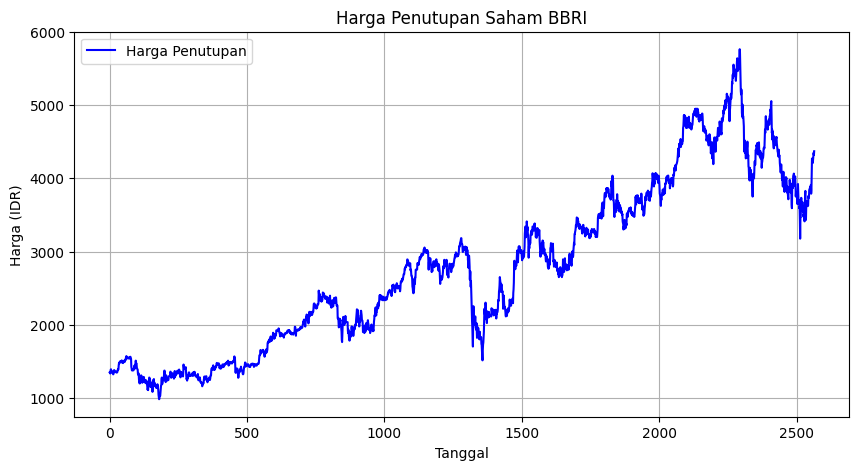

In [13]:
# Cek Pola Distribusi
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Harga Penutupan', color='blue')
plt.title('Harga Penutupan Saham BBRI')
plt.xlabel('Tanggal')
plt.ylabel('Harga (IDR)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Cek missing values
print(data.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Date_Only       0
dtype: int64


**DESKRIPSI VARIABEL**
- Open: Harga saham pada saat pembukaan perdagangan di hari tersebut. Ini adalah harga transaksi pertama untuk hari itu.

- High: Harga tertinggi yang dicapai oleh saham selama sesi perdagangan di hari tersebut.

- Low: Harga terendah yang dicapai oleh saham selama sesi perdagangan di hari tersebut.

- Close: Harga saham pada saat penutupan perdagangan di hari tersebut. Ini sering dianggap sebagai harga paling penting untuk hari itu.

- Volume: Jumlah saham yang diperdagangkan selama sesi perdagangan di hari tersebut. Volume yang tinggi dapat mengindikasikan minat yang besar pada saham tersebut.

- Dividends: Jumlah dividen tunai yang dibayarkan per saham pada tanggal tertentu. Jika tidak ada dividen, nilainya biasanya nol.

- Stock Splits: Informasi mengenai pemecahan saham (stock split). Ini biasanya dinyatakan sebagai rasio (misalnya, 2:1 berarti setiap pemegang saham menerima dua saham baru untuk setiap satu saham lama yang mereka miliki). Jika tidak ada pemecahan saham, nilainya mungkin 1 atau indikator lain yang menunjukkan tidak ada perubahan.

###Menangani Missing Value

*Dilewati karena tidak ada missing value*

###Menangani Outliers

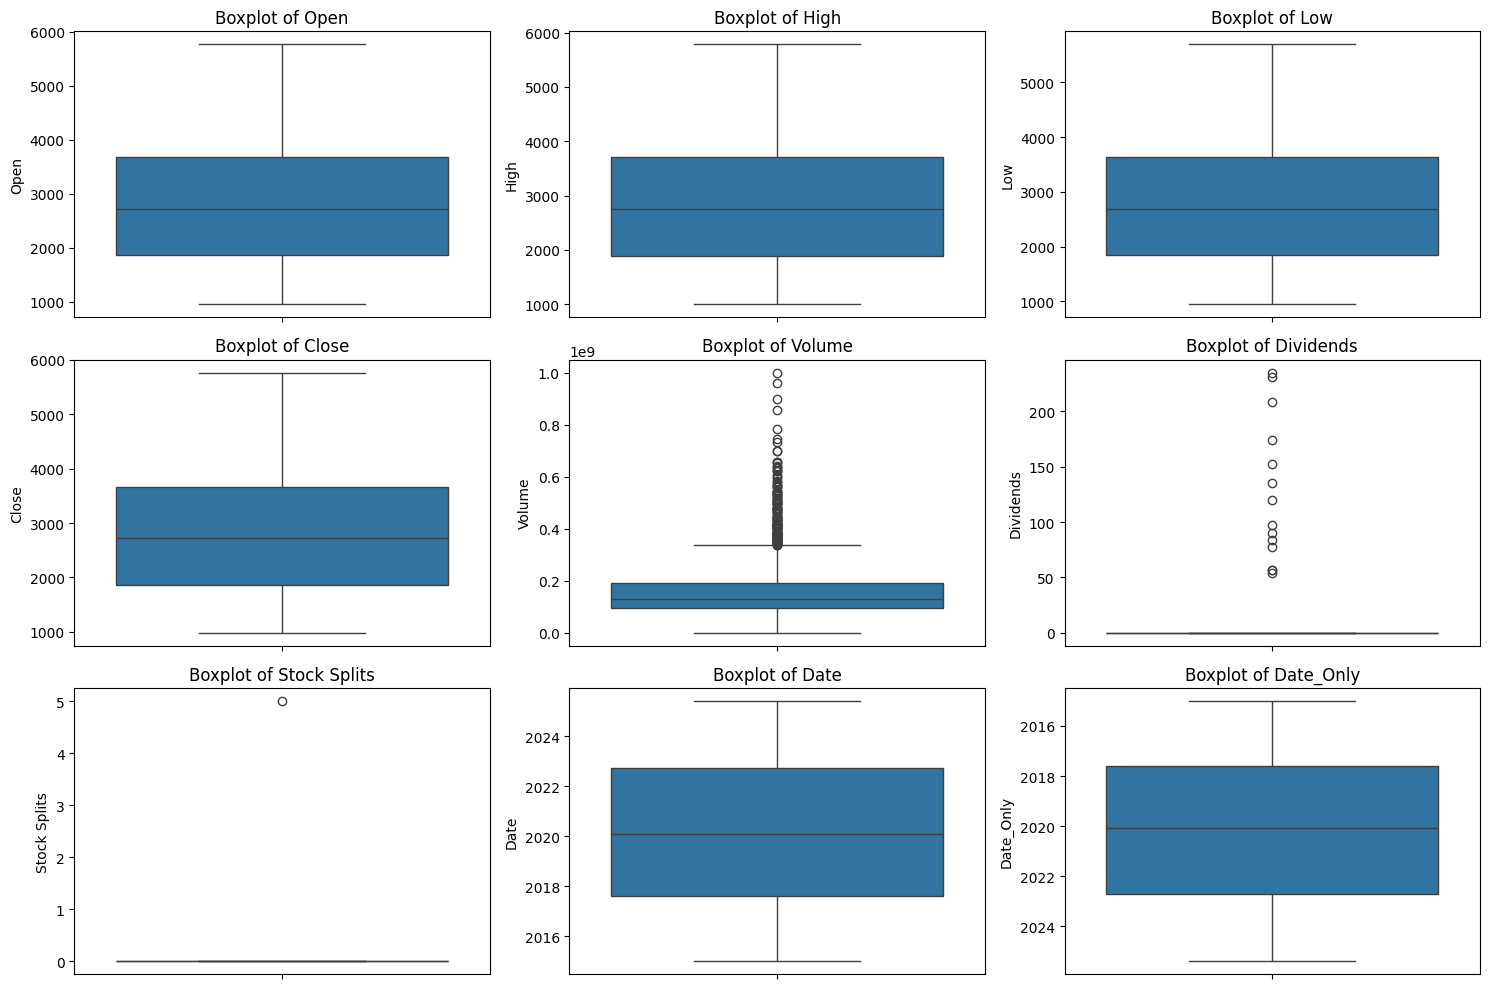

Identifikasi Outlier untuk Setiap Variabel:

Outliers in Open: []

Outliers in High: []

Outliers in Low: []

Outliers in Close: []

Outliers in Volume: [546873345, 497780047, 342672968, 376079995, 347453101, 399282146, 381805594, 379040696, 456977593, 412974083, 385544559, 512537352, 366381128, 370975907, 418181573, 408559706, 569723380, 365772377, 450918248, 343554524, 391042344, 414291135, 658210668, 544651637, 698059077, 529032687, 346502244, 445935822, 351010672, 404530667, 442565694, 475289499, 405546974, 372457853, 517300545, 654135428, 501017513, 584451204, 433842983, 444514707, 476102523, 498739044, 959884609, 514215761, 481917223, 422772612, 487562851, 409589324, 519350210, 372556634, 339338591, 373640813, 373214336, 505369848, 641858446, 622129055, 392814584, 366633582, 493687757, 422093240, 355113743, 464366860, 340183845, 345533898, 622692705, 481002668, 346529100, 357971300, 410533900, 416087300, 432390800, 634549600, 380151200, 416099000, 359864700, 446708800, 468016600,

In [43]:
# Visualisasi Boxplot untuk Semua Variabel
plt.figure(figsize=(15, 10))
for i, column in enumerate(data):  # Iterasi melalui kunci data
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[column])  # Menggunakan data[column]
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Identifikasi Outlier (Contoh untuk satu kolom, bisa diulang untuk yang lain)
def identify_outliers(data, column):
    Q1 = pd.Series(data[column]).quantile(0.25)
    Q3 = pd.Series(data[column]).quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data[column] if x < lower_bound or x > upper_bound]
    return outliers

print("Identifikasi Outlier untuk Setiap Variabel:")
for column in data:
    outliers = identify_outliers(data, column)
    print(f"\nOutliers in {column}: {outliers}")

Karena akan berfokus pada lebel 'Close' maka selagi tidak mengandung outliers padanya, akan dibiarkan outlier lainnya.

###Univariate Analysis

In [44]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

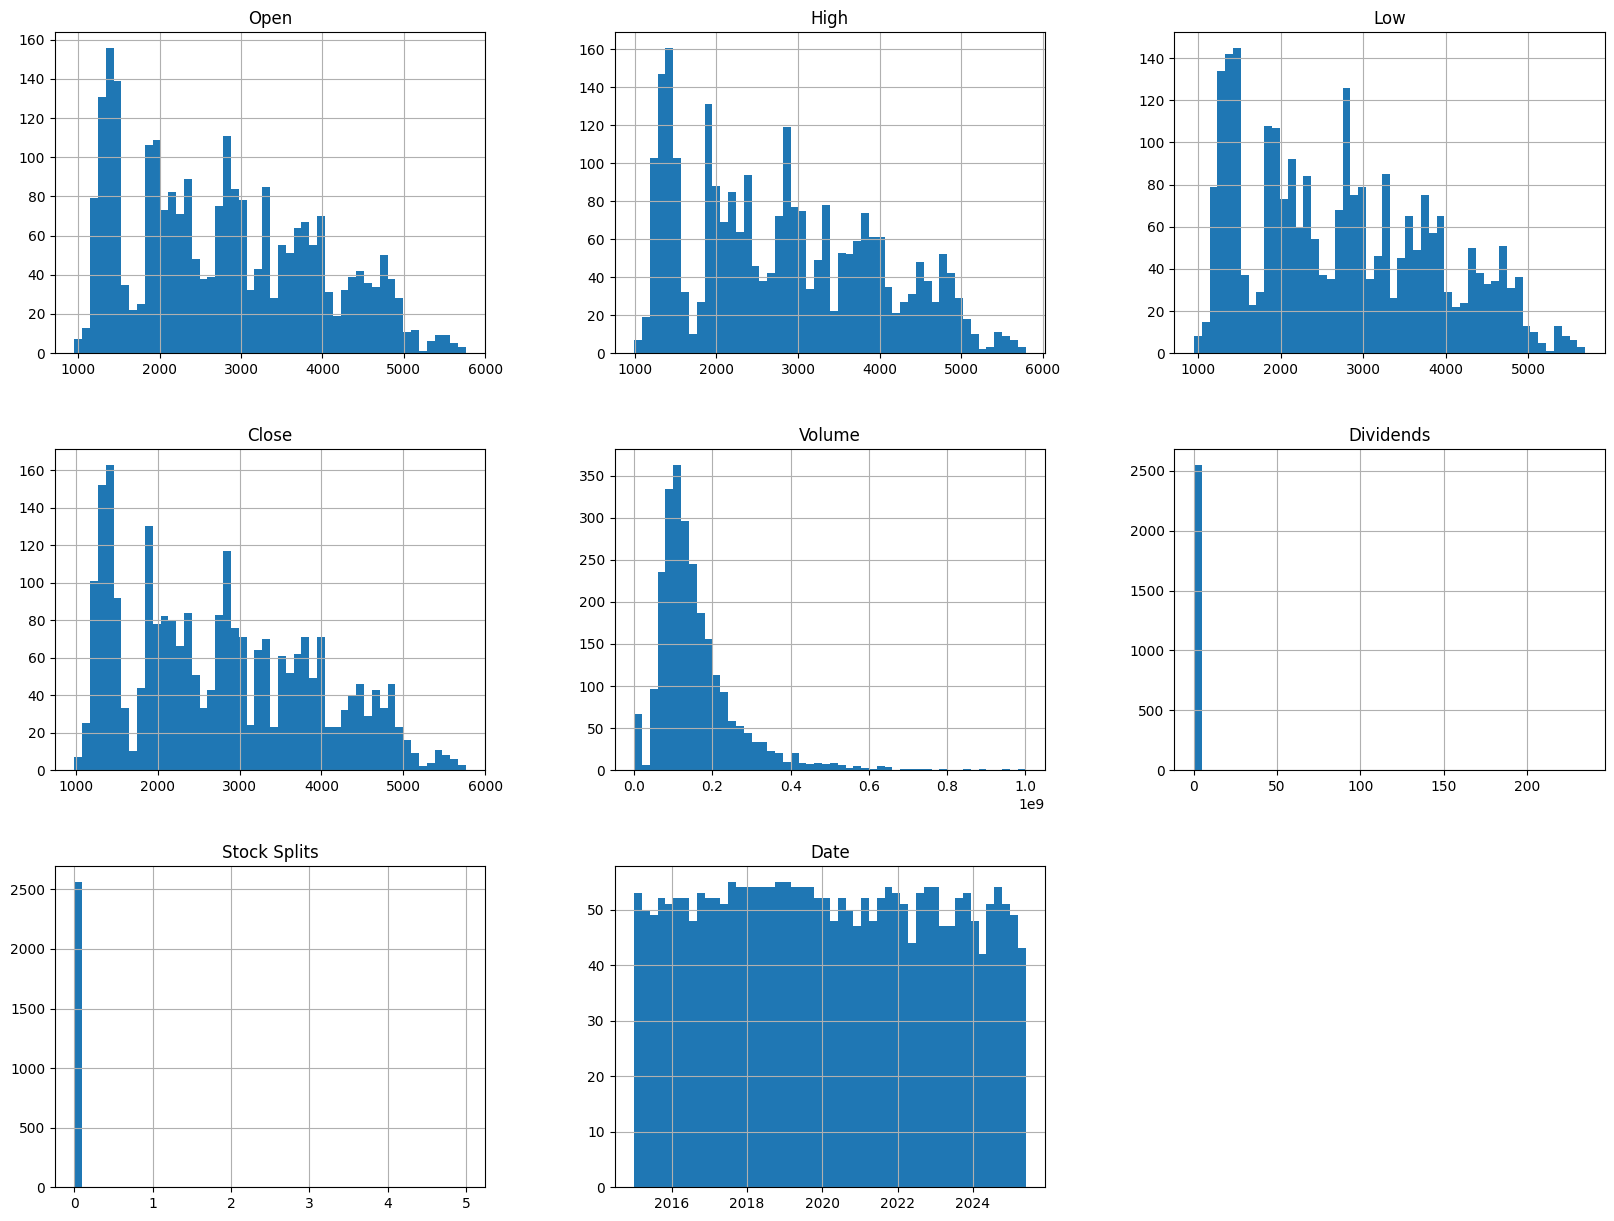

In [45]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Diperoleh insight:

- Distribusi variabel harga dan volume menunjukkan karakteristik tipikal data pasar keuangan.

- Variabel Dividends dan Stock Splits menunjukkan kejadian yang jarang namun spesifik.

- Data tanggal terlihat mencakup periode waktu yang luas.

###Multivariate Analysis

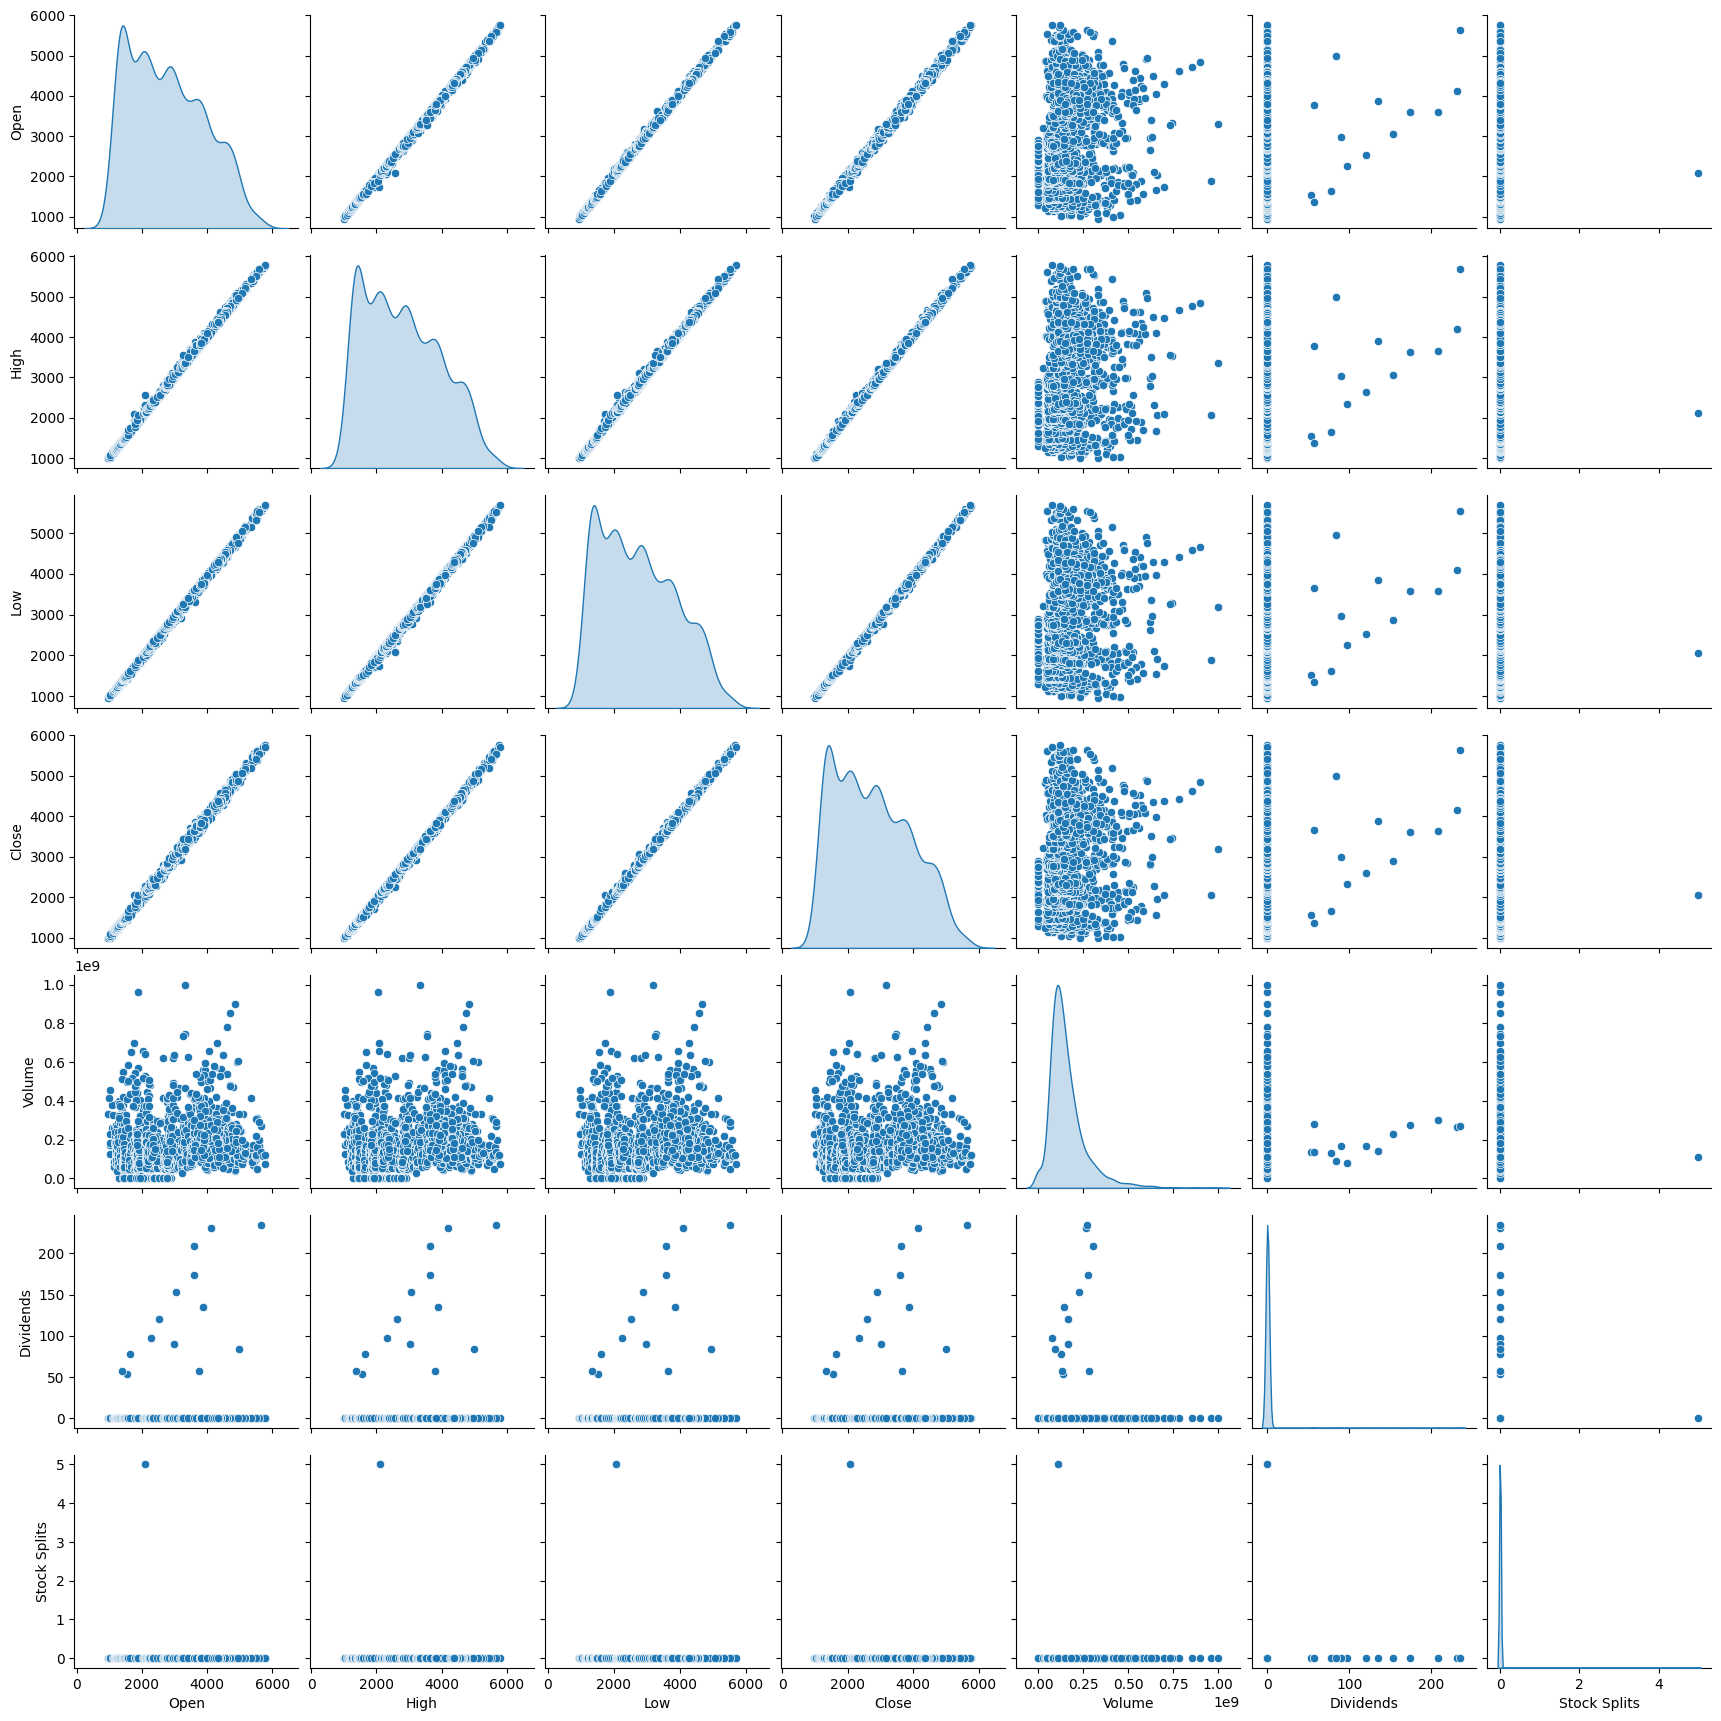

In [46]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

Insight

- Korelasi Tinggi Antar Harga: Ada korelasi linear positif yang sangat kuat antara Open, High, Low, dan Close. Ini menunjukkan multikolinearitas yang tinggi antar fitur-fitur harga.

- Korelasi Lemah dengan Volume, Dividends, Stock Splits: Tidak ada korelasi linear yang kuat yang terlihat antara variabel harga dengan Volume, Dividends, atau Stock Splits.

- Dividends dan Stock Splits Jarang: Kejadian dividen di atas nol dan stock split selain 1 relatif jarang dalam dataset ini.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

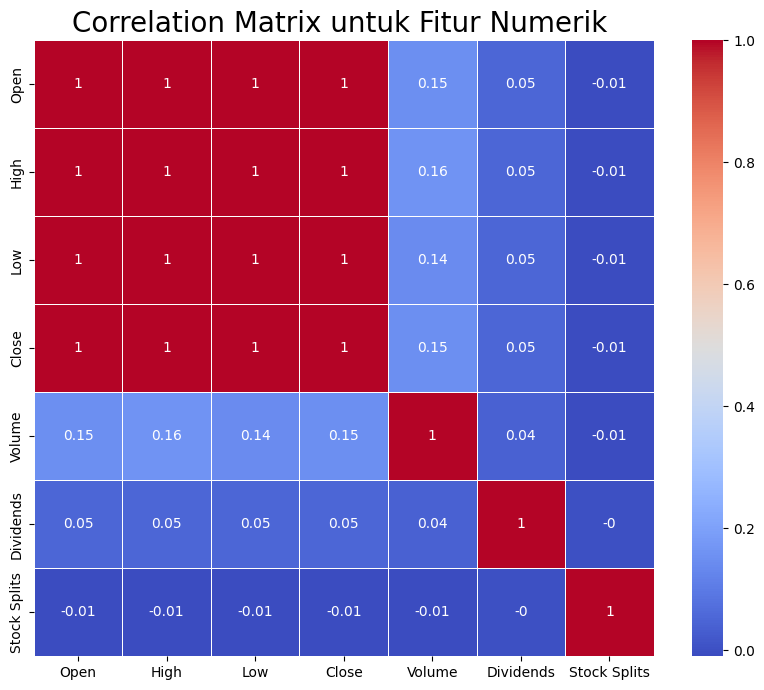

In [47]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Insight

- Redundansi Fitur Harga: Karena korelasi yang sangat tinggi antar Open, High, Low, dan Close, maka tidak perlu menggunakan keempatnya sebagai fitur dalam model LSTM. Memilih salah satu atau beberapa yang paling relevan, adapun yang dipilih adalah yang close.

- Volume, Dividends, Stock Splits sebagai Informasi Tambahan: Variabel Volume, Dividends, dan Stock Splits tampaknya memberikan informasi yang relatif independen dari pergerakan harga harian secara linear. Mereka mungkin berguna sebagai fitur tambahan untuk memberikan konteks pasar atau peristiwa perusahaan. Namun, karena korelasinya yang lemah, model mungkin perlu belajar hubungan yang lebih kompleks (non-linear) untuk memanfaatkan fitur-fitur ini.

In [48]:
data.drop(['Stock Splits', 'Dividends','Volume'], inplace=True, axis=1)
data.head()

,Open,High,Low,Close,Date,Date_Only
0,1334.106638,1357.258025,1334.106638,1348.576294,2015-01-02 00:00:00+07:00,2015-01-02
1,1342.787964,1354.363809,1339.894003,1342.787964,2015-01-05 00:00:00+07:00,2015-01-05
2,1337.000129,1345.682014,1331.212362,1334.106323,2015-01-06 00:00:00+07:00,2015-01-06
3,1342.787958,1363.045532,1339.893997,1363.045532,2015-01-07 00:00:00+07:00,2015-01-07
4,1365.939569,1386.197144,1365.939569,1386.197144,2015-01-08 00:00:00+07:00,2015-01-08


#Data Preparation

###Encoding Fitur Kategori

*Tidak dilakukan karena tidak ada kolom kategorikal*

###Pembagian dataset dengan fungsi train_test_split dari library sklearn

In [17]:
training_data = np.array(data[:int(data.shape[0]*0.8)])
test_data = np.array(data[int(data.shape[0]*0.8):])
print(training_data.shape)
print(test_data.shape)

(2052, 1)
(513, 1)


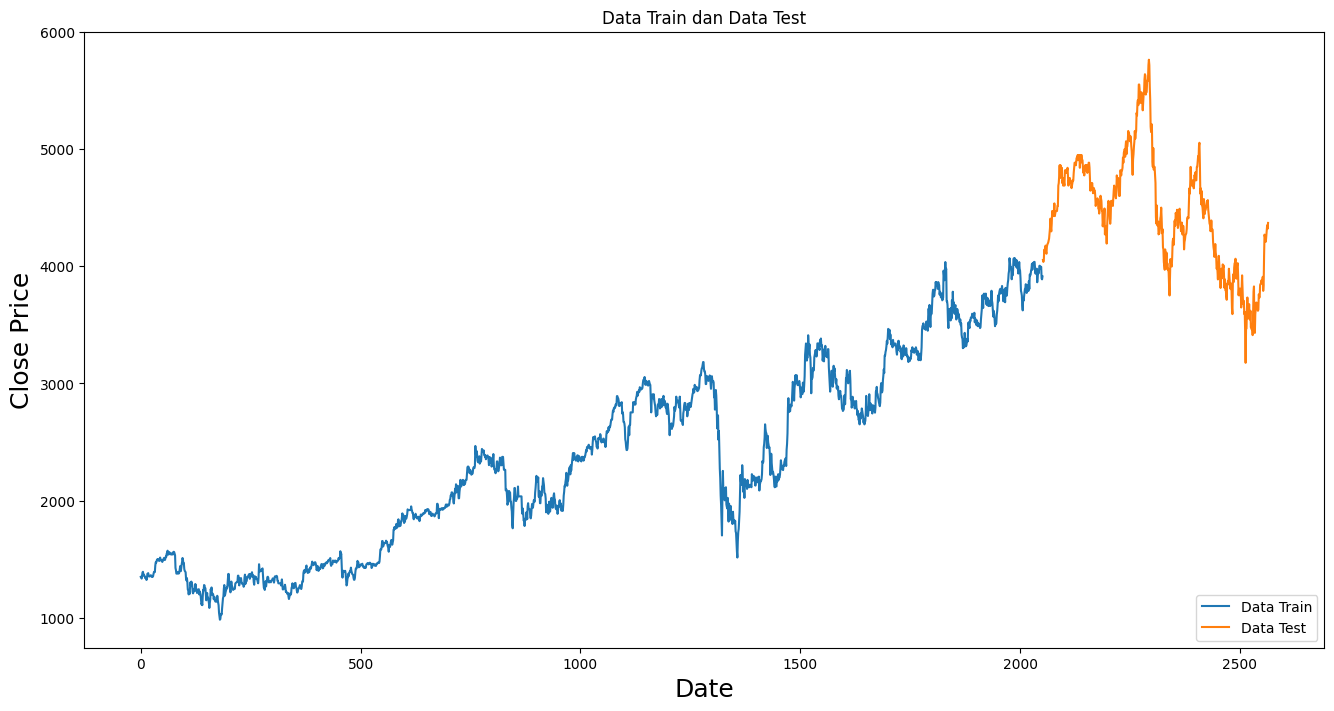

In [18]:
#Visualisasi setelah melakukan split data
data_train = data.iloc[0:int(len(data)*0.8)]
data_test = data.iloc[int(len(data)*0.8):]

plt.figure(figsize=(16,8))
plt.title('Data Train dan Data Test')
plt.plot(data_train.index, data_train['Close'])
plt.plot(data_test.index, data_test['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Data Train', 'Data Test'], loc='lower right')
plt.show()

###Normalisasi

In [19]:
sc = MinMaxScaler(feature_range=(0,1))
training_data = sc.fit_transform(training_data)
test_data = sc.transform(test_data)
print(training_data)
print(test_data)

[[0.118512  ]
 [0.11663624]
 [0.11382289]
 ...
 [0.94419531]
 [0.94151463]
 [0.94955722]]
[[0.99513232]
 [0.98977057]
 [0.99513232]
 [1.02361265]
 [1.01517163]
 [1.02361265]
 [1.03486734]
 [1.01798531]
 [1.01235812]
 [1.03205367]
 [1.03768101]
 [1.04049469]
 [1.04330836]
 [1.04893555]
 [1.05456289]
 [1.06863126]
 [1.08269962]
 [1.10942951]
 [1.08551329]
 [1.0742586 ]
 [1.09536115]
 [1.1305319 ]
 [1.11646353]
 [1.1305319 ]
 [1.11646353]
 [1.1305319 ]
 [1.15163444]
 [1.11646353]
 [1.12349772]
 [1.1305319 ]
 [1.1305319 ]
 [1.1305319 ]
 [1.1305319 ]
 [1.1446001 ]
 [1.1446001 ]
 [1.2008734 ]
 [1.20790758]
 [1.22901028]
 [1.25714685]
 [1.22197594]
 [1.25714685]
 [1.24307833]
 [1.22901028]
 [1.25011267]
 [1.20790758]
 [1.21494176]
 [1.2008734 ]
 [1.22197594]
 [1.20790758]
 [1.2008734 ]
 [1.24307833]
 [1.24307833]
 [1.23604431]
 [1.24307833]
 [1.23604431]
 [1.24307833]
 [1.25011267]
 [1.22197594]
 [1.2008734 ]
 [1.21494176]
 [1.20790758]
 [1.22197594]
 [1.21494176]
 [1.21494176]
 [1.20790758]


In [20]:
def create_dataset(data):
    x, y = [], []
    for i in range(50, data.shape[0]):
        x.append(data[i-50:i, 0])
        y.append(data[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

In [21]:
x_train, y_train = create_dataset(training_data)
x_test, y_test = create_dataset(test_data)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Modelling

In [24]:
model = Sequential()
model.add(LSTM(units=84, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=84, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=84, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=84))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - loss: 0.0453 - mean_absolute_error: 0.1450
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 0.0042 - mean_absolute_error: 0.0473
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - loss: 0.0032 - mean_absolute_error: 0.0412
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 0.0046 - mean_absolute_error: 0.0484
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0035 - mean_absolute_error: 0.0427
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0034 - mean_absolute_error: 0.0415
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0032 - mean_absolute_error: 0.0415
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0028 - mean_absolute_error: 0.0387
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.0027 - mean_absolute_error: 0.0374
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0031 - mean_absolute_error: 0.0407
Epoch 11/100
6

In [26]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)
y_test_scaled = sc.inverse_transform(y_test.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step


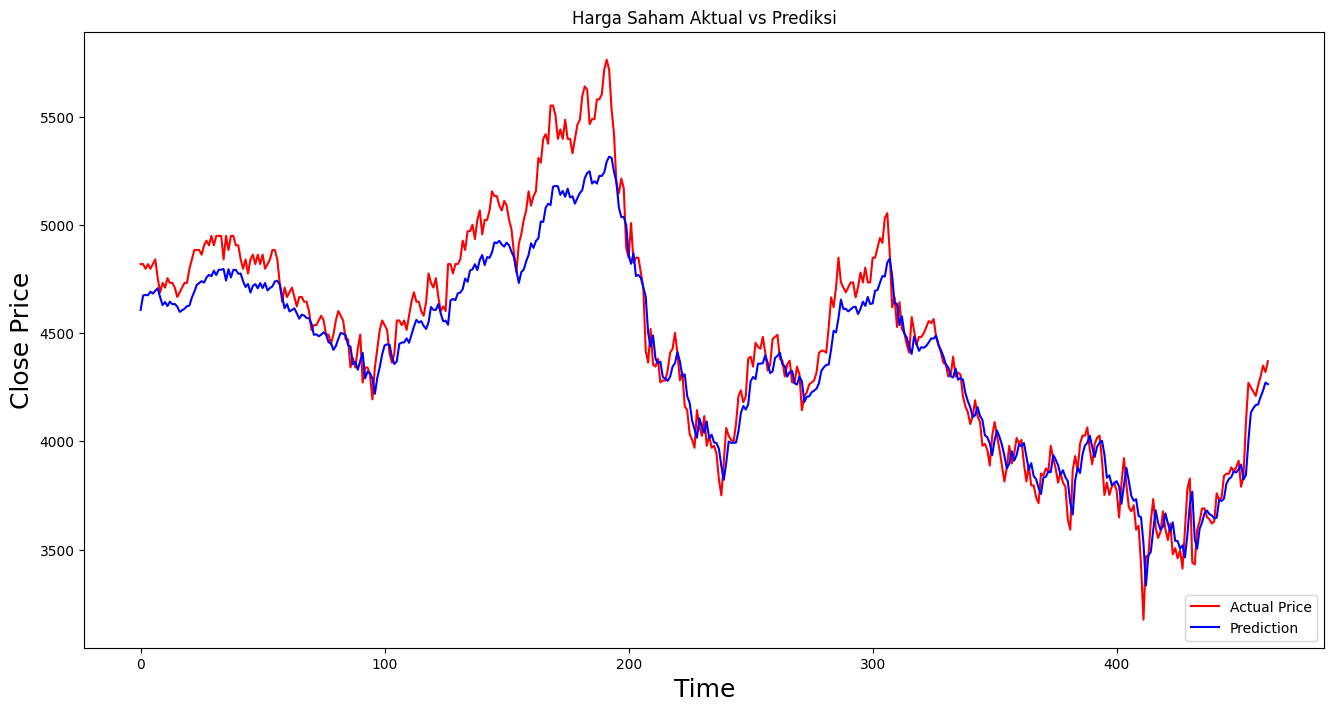

In [27]:
plt.figure(figsize=(16,8))
plt.title('Harga Saham Aktual vs Prediksi')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(y_test_scaled, color='red', label='Actual Price')
plt.plot(predictions, color='blue', label='Predicted Price')
plt.legend(['Actual Price','Prediction'],loc='lower right')
plt.show()

#Evaluation

In [51]:
# Hitung metrik evaluasi
mae = mean_absolute_error(y_test_scaled, predictions)
mse = mean_squared_error(y_test_scaled, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 110.9495
Mean Squared Error (MSE): 20332.4275
Root Mean Squared Error (RMSE): 142.5918


#Deployment

In [53]:
# Save the trained model
model.save('stock_prediction_model.h5')

# Save the scaler used for normalization
joblib.dump(sc, 'scaler.pkl')

print("Model and scaler saved for deployment.")


Model and scaler saved for deployment.
